In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('df_Florida.csv')

In [3]:
df.describe()

,Profit,Marketing Spend
count,16.000000,16.000000
mean,118774.024375,247323.551250
std,35605.470428,89948.684628
min,49490.750000,91131.240000
25%,99147.922500,191962.792500
50%,109543.120000,253176.180000
75%,142719.627500,303681.627500
max,191050.390000,407934.540000


In [4]:
x = df["Profit"]
y = df["Marketing Spend"]
m = len(x)

In [5]:
def h(x, a0, a1):               
    h = a0 + a1*x
    return h
def J(a0, a1, x, y, m):                       
    j = 0
    for i in range (m):
        j += (h(x[i], a0, a1) - y[i]) ** 2
    return j/(2*m)
def gradJ(a0, a1, x, y, m):     
    Dja0 = 0 
    Dja1 = 0
    for i in range (m):
        Dja0 += (h(x[i],a0,a1) - y[i])
        Dja1 += (h(x[i],a0,a1) - y[i]) * x[i]
    gradJ = [Dja0/m, Dja1/m]
    return gradJ
def ap1(a0, a1, gJ, alpha): 
    a0p1 = a0 - alpha * gJ[0]
    a1p1 = a1 - alpha * gJ[1]
    ap1 = [a0p1, a1p1]
    return ap1

1.4315814600501124 0.9038989123935075


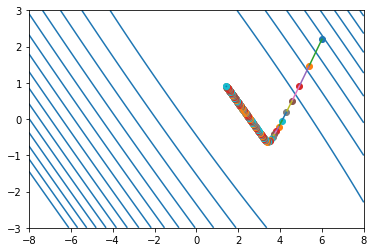

In [7]:
fig, ax = plt.subplots()
p0 = np.linspace(-8,8, 500)
p1 = np.linspace(-3,3, 500)
pa0, pa1 = np.meshgrid(p0, p1)  

ax.contour(pa0,pa1,J(pa0,pa1,x/100000,y/100000,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,5)])
a0 = 6
a1 = 2.2
ax.plot(a0,a1, 'o')

for i in range(300):
    a0old, a1old = a0, a1
    a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x/100000,y/100000,m), alpha=0.1 )
    ax.plot(a0,a1,'o')
    ax.plot([a0old,a0],[a1old,a1], '-')
    

print(a0,a1)

In [8]:
x_mean = x.mean()
x_std = x.std()

y_mean = y.mean()
y_std = y.std()

x_new = (x - x_mean) / x_std          
y_new = (y - y_mean) / y_std

-1 4
-0.49999999999999845 2.3919273786826043
-0.24999999999999822 1.5376387986077376
-0.1249999999999984 1.0837979904429647
-0.062499999999998654 0.8426950611054291
-0.03124999999999884 0.7146091298948634
-0.01562499999999896 0.6465634789392503
-0.007812499999999056 0.6104142268690809
-0.003906249999999112 0.5912099367068033
-0.0019531249999991396 0.5810076575580934
-0.0009765624999991604 0.5755876967603412


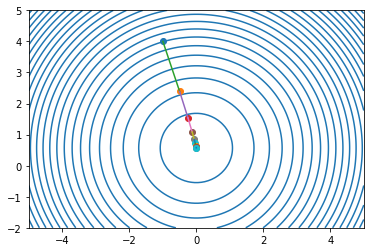

In [9]:
def plot_steps( startpt=[-1,4], alpha=.5, nsteps=10) : 
    fig, ax = plt.subplots()
    p0 = np.linspace(-5,5, 100)
    p1 = np.linspace(-2,5, 100)
    pa0, pa1 = np.meshgrid(p0, p1)

    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,.9)])

    a0 = startpt[0]; a1 = startpt[1]
    ax.plot(a0,a1, 'o')
    print(a0,a1)

    for i in range(nsteps):
        a0old, a1old = a0, a1
        a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x_new,y_new,m), alpha=alpha)
        print(a0,a1) 
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1], '-')
        
plot_steps( startpt=[-1,4], alpha=.5, nsteps=10)

In [11]:
def plot_graph(x, y, a0, a1):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o', label = "traning data")
    ax.plot(x, h(x_new, a0, a1), label = "h(x) = %.2f + %.2f * x" %(a0, a1))
    plt.legend()

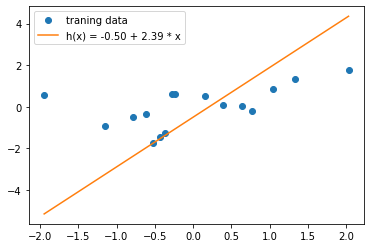

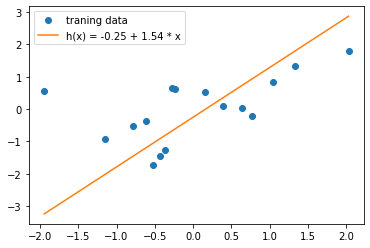

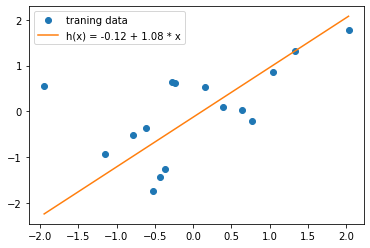

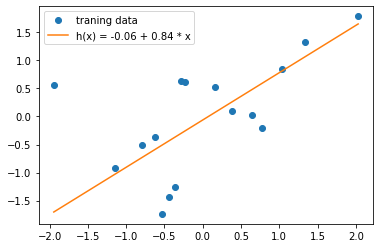

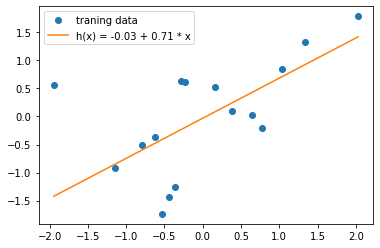

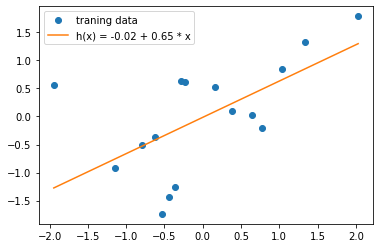

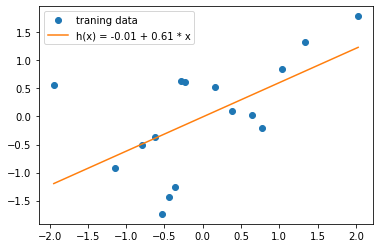

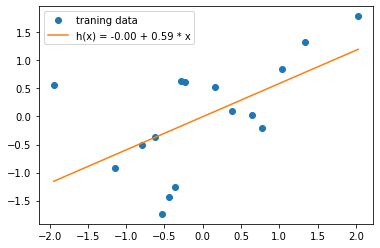

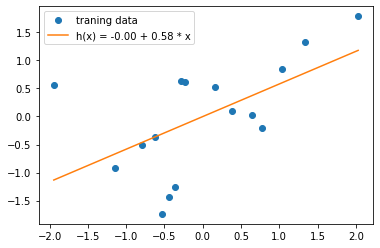

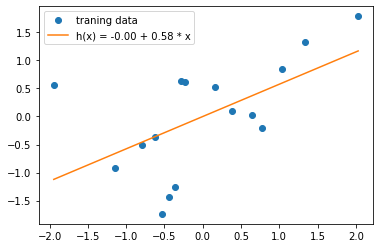

In [12]:
a0 = -1 
a1 = 4
for i in range (10) :
    a0, a1 = ap1(a0, a1, gJ = gradJ(a0, a1, x_new, y_new, m), alpha = 0.5)
    plot_graph(x_new, y_new, a0, a1)

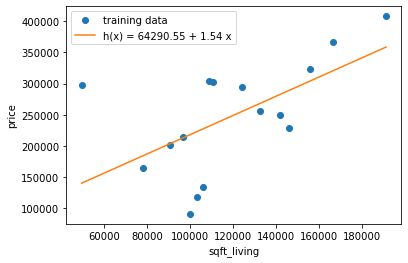

In [13]:
a0 = 0; a1 = 0.61
b1 = y_std/x_std * a1
b0 = y_std * a0 - b1*x_mean + y_mean

fig, ax = plt.subplots()
ax.plot(x,y, 'o', label='training data')
ax.plot(x, b0 + b1*x, label='h(x) = %.2f + %.2f x' %(b0, b1))
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')
plt.legend();

In [14]:
def predict(x, a0, a1) :
    pre = y_std * (a0 + a1 * (x - x_mean)/x_std) + y_mean
    return pre

In [16]:
a0 = 0
a1 = 0.61
predict(8000, a0, a1)

76618.70239156694